#   CASE NEO CONSULTING BANK

##   Stage 1: Business Problem Understanding

El banco NEO Bank está preocupado porque cada vez más clientes abandonan sus servicios de tarjetas de crédito. La solucion para evitar esto es realizar un modelo que les permita predecir cuando un cliente sea propenso a cancelar este servicio con el objetivo que ellos puedan acudir proactivamente al cliente para otorgarle mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta.

##   Stage 2: Data Collection

La data que se usara para la solución se encuentra en el siguiente link : https://drive.google.com/file/d/1HpRTKH14f4smwO6S7JyxoGqa35Z4R6Wp/view <br>

Las variables que se encuentra en dicha data son:

●   Variable dependiente

    ❖ Status_client: estado actual del cliente con el banco, puede ser Existing Customer o Attrited Customer (TARGET)

●   Variables independientes

    ❖ Client_id: ID del cliente                                                                                        (IDENTIFY)
    ❖ Gender: género del cliente                                                                                       (CATEGORICA)
    ❖ Education_Level: nivel de educación del cliente                                                                  (CATEGORICA)
    ❖ Marital_Status: estado civil del cliente                                                                         (CATEGORICA)
    ❖ Income_Category: nivel de ingresos del cliente                                                                   (CATEGORICA)
    ❖ Card_Category: categoría de tarjeta del cliente                                                                  (CATEGORICA)

    ❖ Customer_Age: edad del cliente                                                                                   (CONTINUA)
    ❖ Dependent_count: cantidad de personas dependientes del cliente                                                   (CONTINUA)
    ❖ Months_on_book: meses de relación con el banco                                                                   (CONTINUA)
    ❖ Total_Relationship_Count: número total de productos en poder del cliente                                         (CONTINUA)
    ❖ Months_Inactive_12_mon: Nº de meses inactivos en los últimos 12 meses                                            (CONTINUA)
    ❖ Contacts_Count_12_mon: Nº de Contactos en los últimos 12 meses                                                   (CONTINUA)        
    ❖ Credit_Limit: línea de crédito de tarjeta                                                                        (CONTINUA)
    ❖ Total_Revolving_Bal: saldo rotatorio total de la tarjeta de crédito                                              (CONTINUA)
    ❖ Avg_Open_To_Buy: línea de Crédito Abierta para Comprar (Promedio de los últimos 12 meses)                        (CONTINUA)
    ❖ Total_Amt_Chng_Q4_Q1: cambio en el monto de la transacción (Q4 sobre Q1)                                         (CONTINUA)
    ❖ Total_Trans_Amt: monto total de la transacción (últimos 12 meses)                                                (CONTINUA)
    ❖ Total_Trans_Ct: recuento total de transacciones (últimos 12 meses)                                               (CONTINUA)
    ❖ Total_Ct_Chng_Q4_Q1: cambio en el recuento de transacciones (cuarto trimestre respecto al primer trimestre)      (CONTINUA)
    ❖ Avg_Utilization_Ratio: Índice de utilización promedio de la tarjeta                                              (CONTINUA)

##   Stage 3: Data Preparation 

<h3> Data Cleaning and Processing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
def fn_desplegar_graficoBarras(df, selected_columns, num_rows, num_cols, u_fig_size):
    
    plot_index = 1

    plt.figure(figsize=u_fig_size)

    for column in selected_columns:
        counts = df[column].value_counts()
        total_count = len(df)
        percentages = (counts / total_count) * 100

        plt.subplot(num_rows, num_cols, plot_index)
        ax = percentages.plot(kind='bar', color='gray')
        plt.ylabel('Percentage')
        plt.title(f'{column} Distribution')
        plt.xticks(rotation=0)
        plt.ylim(0, 100)
        plt.gca().yaxis.grid(True)
        
        if 'Unknown' in percentages.index:
            unknown_index = percentages.index.get_loc('Unknown')
            ax.patches[unknown_index].set_facecolor('red')
        
        for i, v in enumerate(percentages):
            ax.text(i, v + 2, f'{v:.2f}%', ha='center', color='black', fontweight='bold')

        plot_index += 1

    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv(r'C:\Personal\TRABAJO\NEO CONSULTING\BankChurners.csv')
df.head()

,Client_id,Status_client,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_id                 10127 non-null  int64  
 1   Status_client             10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Comentario: Podemos observar a primera vista que la data no tiene celdas vacias, contiene 10127 registros y los tipos de variables son float64(5), int64(10), object(6)

In [5]:
df.drop_duplicates(inplace=True)
df.shape[0]

10127

Comentario: El dataset no cotiene registros duplicados

In [6]:
df['Client_id'] = df['Client_id'].astype(str)
array_id = df['Client_id'].unique()
print(len(array_id))

10127


Comentario: Validamos que nuestro identificador de cliente es unico

In [7]:
# Age Ranges
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']

df['Customer_Age'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)
df['Customer_Age'] = df['Customer_Age'].astype(str)

Comentario: Creamos rangos para las edades

<h3> Exploratory Data Analysis (EDA)

<h4> Variables Cateogoricas:

In [8]:
df_Categorica = df.select_dtypes(include=['object'])
df_Categorica.head()

,Client_id,Status_client,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,768805383,Existing Customer,40-50,M,High School,Married,$60K - $80K,Blue
1,818770008,Existing Customer,40-50,F,Graduate,Single,Less than $40K,Blue
2,713982108,Existing Customer,50-60,M,Graduate,Married,$80K - $120K,Blue
3,769911858,Existing Customer,40-50,F,High School,Unknown,Less than $40K,Blue
4,709106358,Existing Customer,40-50,M,Uneducated,Married,$60K - $80K,Blue


Comentario: Exploramos nuestra variables categoricas, identificamos que Status_cliente seria nuestro Target (Modelo Supervisado)

In [9]:
for column in df_Categorica.columns:
    if column != "Client_id":
        unique_values = df[column].unique()
        print(f"Valores unicos en la columna '{column}': {unique_values}\n")
    else:
        print("")


Valores unicos en la columna 'Status_client': ['Existing Customer' 'Attrited Customer']

Valores unicos en la columna 'Customer_Age': ['40-50' '50-60' '30-40' '60+' '<30']

Valores unicos en la columna 'Gender': ['M' 'F']

Valores unicos en la columna 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Valores unicos en la columna 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']

Valores unicos en la columna 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Valores unicos en la columna 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']



Comentario: Las columnas Education_Level, Marital_Status y Income_Category poseen valores 'Unknown' por lo cual en base al porcentaje que represente de la data debemos decidir entre eliminarlos o reemplazarlos por la moda (común)

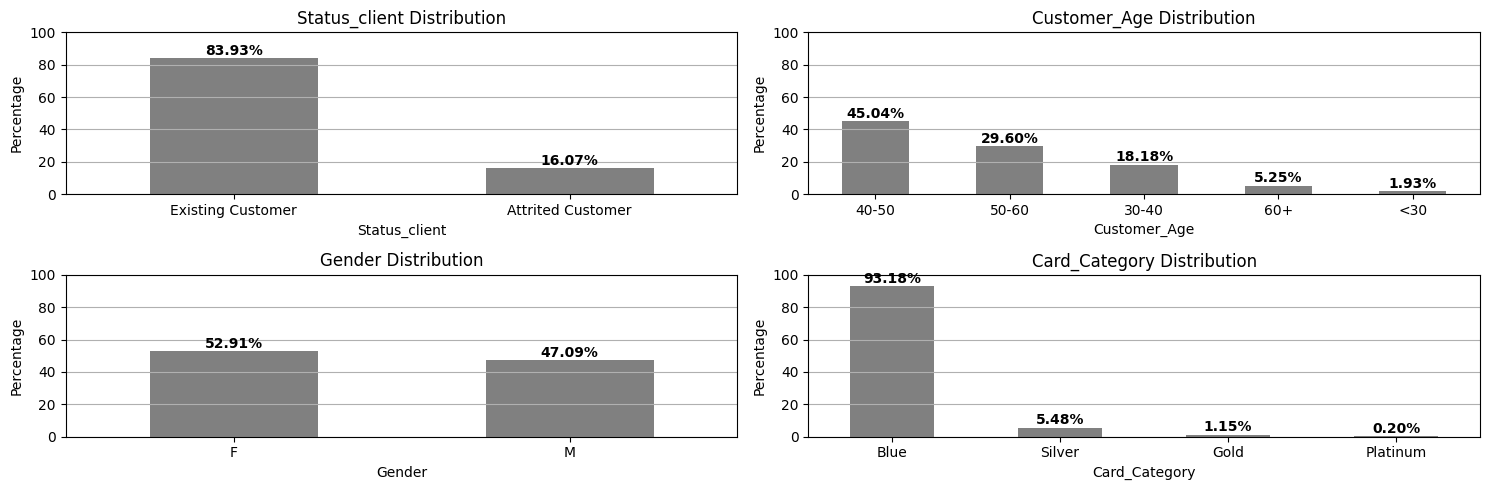

In [10]:
selected_columns = ['Status_client', 'Customer_Age', 'Gender', 'Card_Category']
num_rows = 2
num_cols = 2
fig_size = (15,5)

fn_desplegar_graficoBarras(df_Categorica, selected_columns, num_rows, num_cols, fig_size)

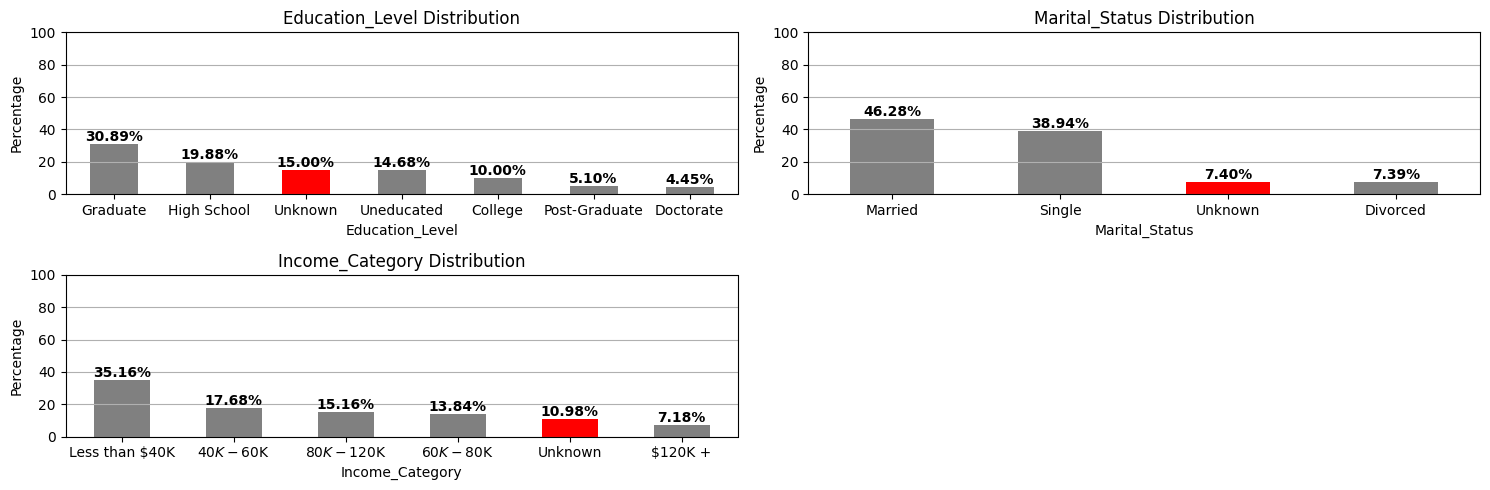

In [11]:
selected_columns = ['Education_Level','Marital_Status', 'Income_Category']
num_rows = 2
num_cols = 2
fig_size = (15,5)

fn_desplegar_graficoBarras(df_Categorica, selected_columns, num_rows, num_cols, fig_size)

In [12]:
print("Antes: ", df.shape[0])
df_temp = df.copy()
df_temp = df_temp[df_temp['Education_Level'] != "Unknown"]
df_temp = df_temp[df_temp['Marital_Status'] != "Unknown"]
df_temp = df_temp[df_temp['Income_Category'] != "Unknown"]
print("Despues: ", df_temp.shape[0])
print("Porcentaje de data eliminado: ", round(100 - (df_temp.shape[0]*100)/df.shape[0],2),"%")

Antes:  10127
Despues:  7081
Porcentaje de data eliminado:  30.08 %


Comentario: Notamos que si recurrimos a eliminar la data, estariamos retirando aprox el 30% de la data por lo cual no eliminaremos registros

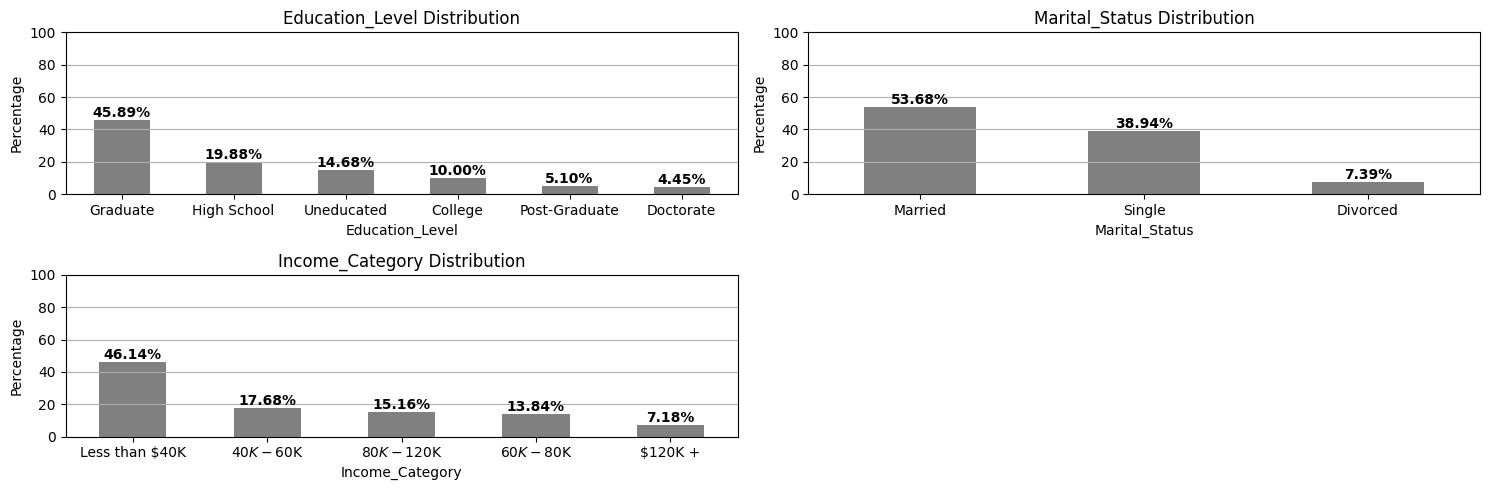

In [13]:
df['Education_Level'] = df['Education_Level'].replace({'Unknown': 'Graduate'})
df['Marital_Status'] = df['Marital_Status'].replace({'Unknown': 'Married'})
df['Income_Category'] = df['Income_Category'].replace({'Unknown': 'Less than $40K'})

selected_columns = ['Education_Level','Marital_Status', 'Income_Category']
num_rows = 2
num_cols = 2
fig_size = (15,5)

fn_desplegar_graficoBarras(df, selected_columns, num_rows, num_cols, fig_size)

Comentario:  Aplicaremos otro metodo que es reemplazar esos valores por la moda (valor que mas se repite) y esto lo tenemos en los graficos de barras. Consideramos hacer este cambio en el dataframe original

In [14]:
selected_columns = ['Status_client', 'Customer_Age', 'Gender', 'Education_Level','Marital_Status', 'Income_Category', 'Card_Category']

label_encoder = LabelEncoder()

#   Transformar
for column in selected_columns:
    df[column] = label_encoder.fit_transform(df[column])

#   Mostrar nuevos valores numericos
for column in selected_columns:
    unique_values = df[column].unique()
    print(f"Valores unicos en la columna '{column}': {unique_values}\n")

Valores unicos en la columna 'Status_client': [1 0]

Valores unicos en la columna 'Customer_Age': [1 2 0 3 4]

Valores unicos en la columna 'Gender': [1 0]

Valores unicos en la columna 'Education_Level': [3 2 5 0 4 1]

Valores unicos en la columna 'Marital_Status': [1 2 0]

Valores unicos en la columna 'Income_Category': [2 4 3 1 0]

Valores unicos en la columna 'Card_Category': [0 1 3 2]



Comentario: Usaremos la funcion LabelEncoder de sckitlearn para poder transformar nuestras variables categoricas en numericas

<h4> Variables Continuas:

In [15]:
df_Continua = df.select_dtypes(include=['int64', 'float64'])
df_Continua.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


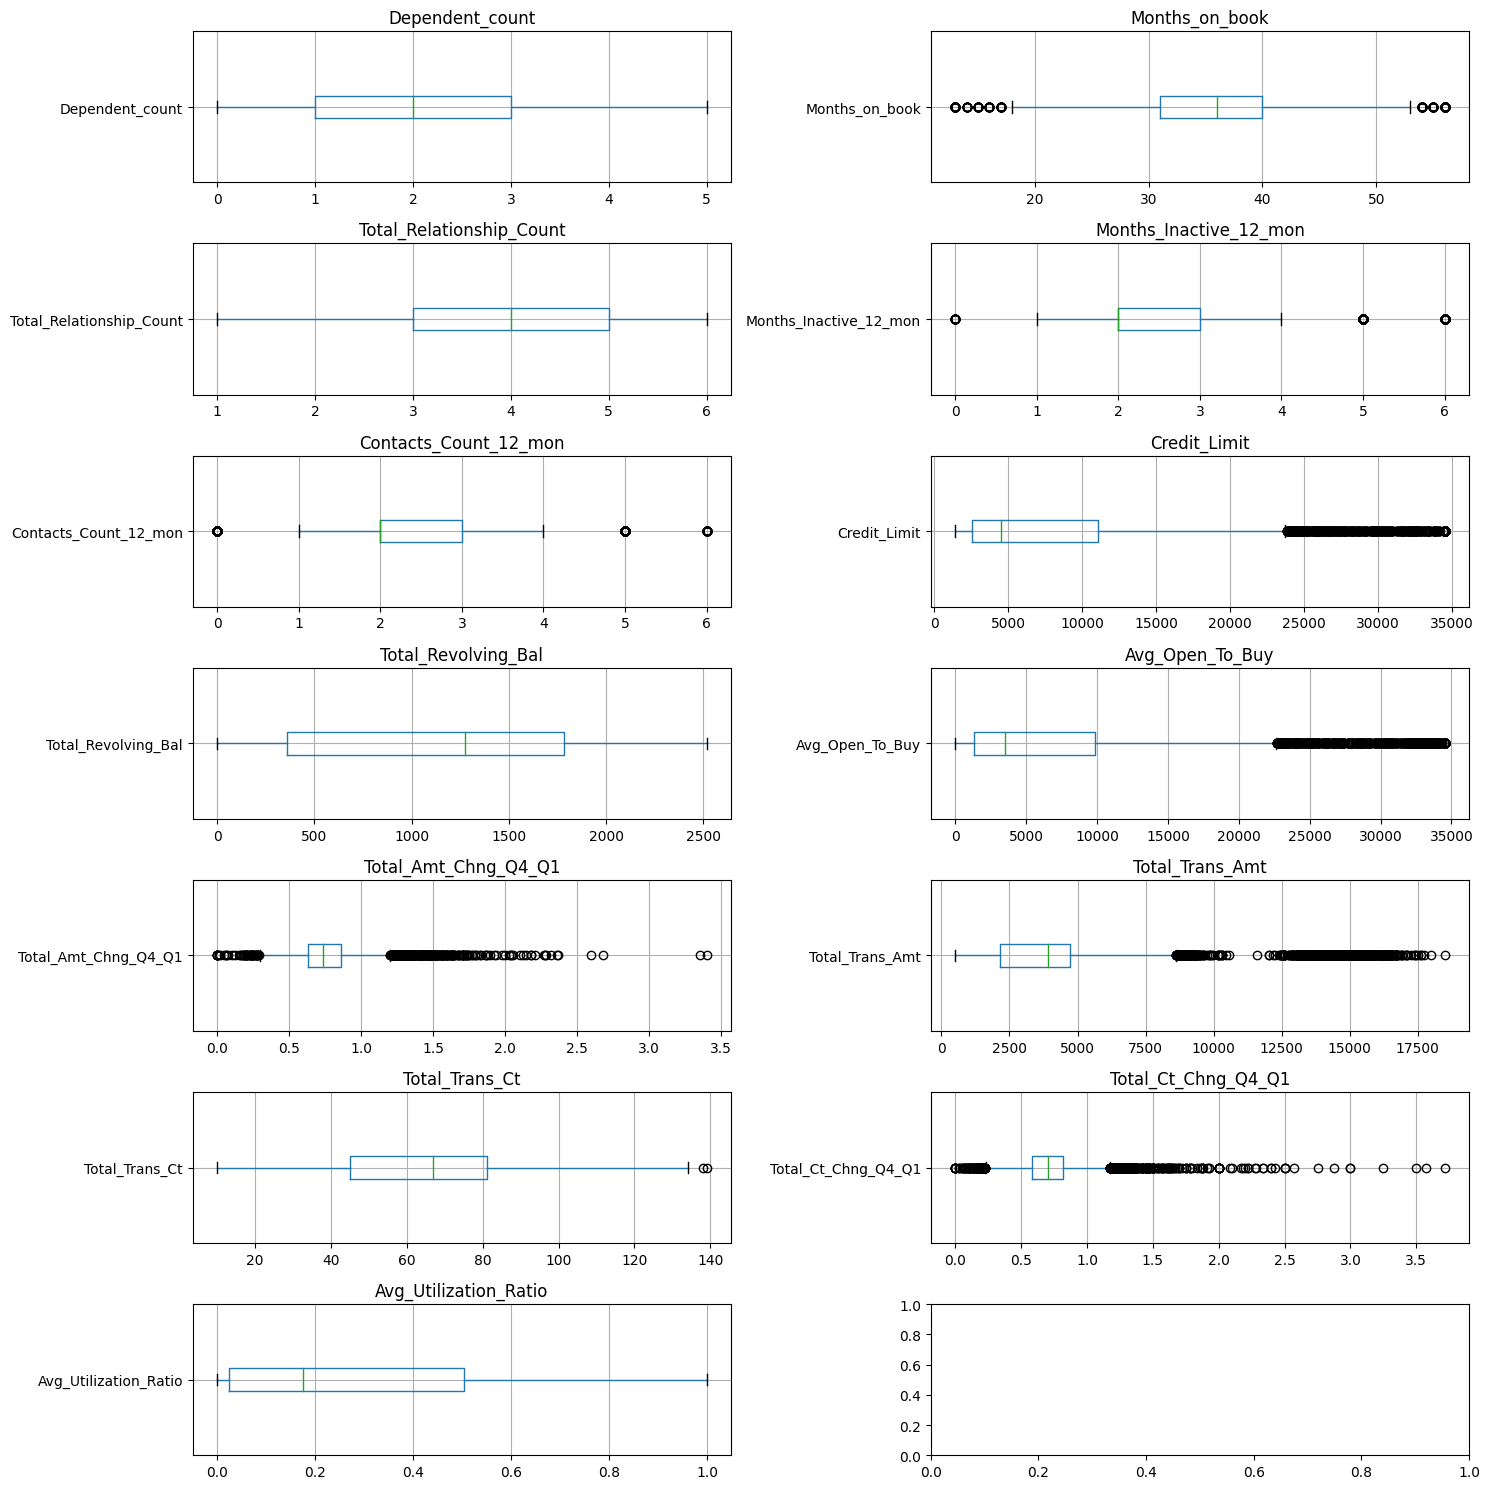

In [16]:
selected_columns = df_Continua.columns

num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axs = axs.flatten()

for i, column in enumerate(selected_columns):
    df.boxplot(column, ax=axs[i], vert=False)
    axs[i].set_title(column)

plt.tight_layout()

plt.show()

Comentario: Observamos que algunas variables de nuestro modelo presentan outliers, existen metodos para poder tratar outliers pero por el tamaño de la data disponible aplicaremos Feature Scaling, para ser mas especificos RobustScaler.

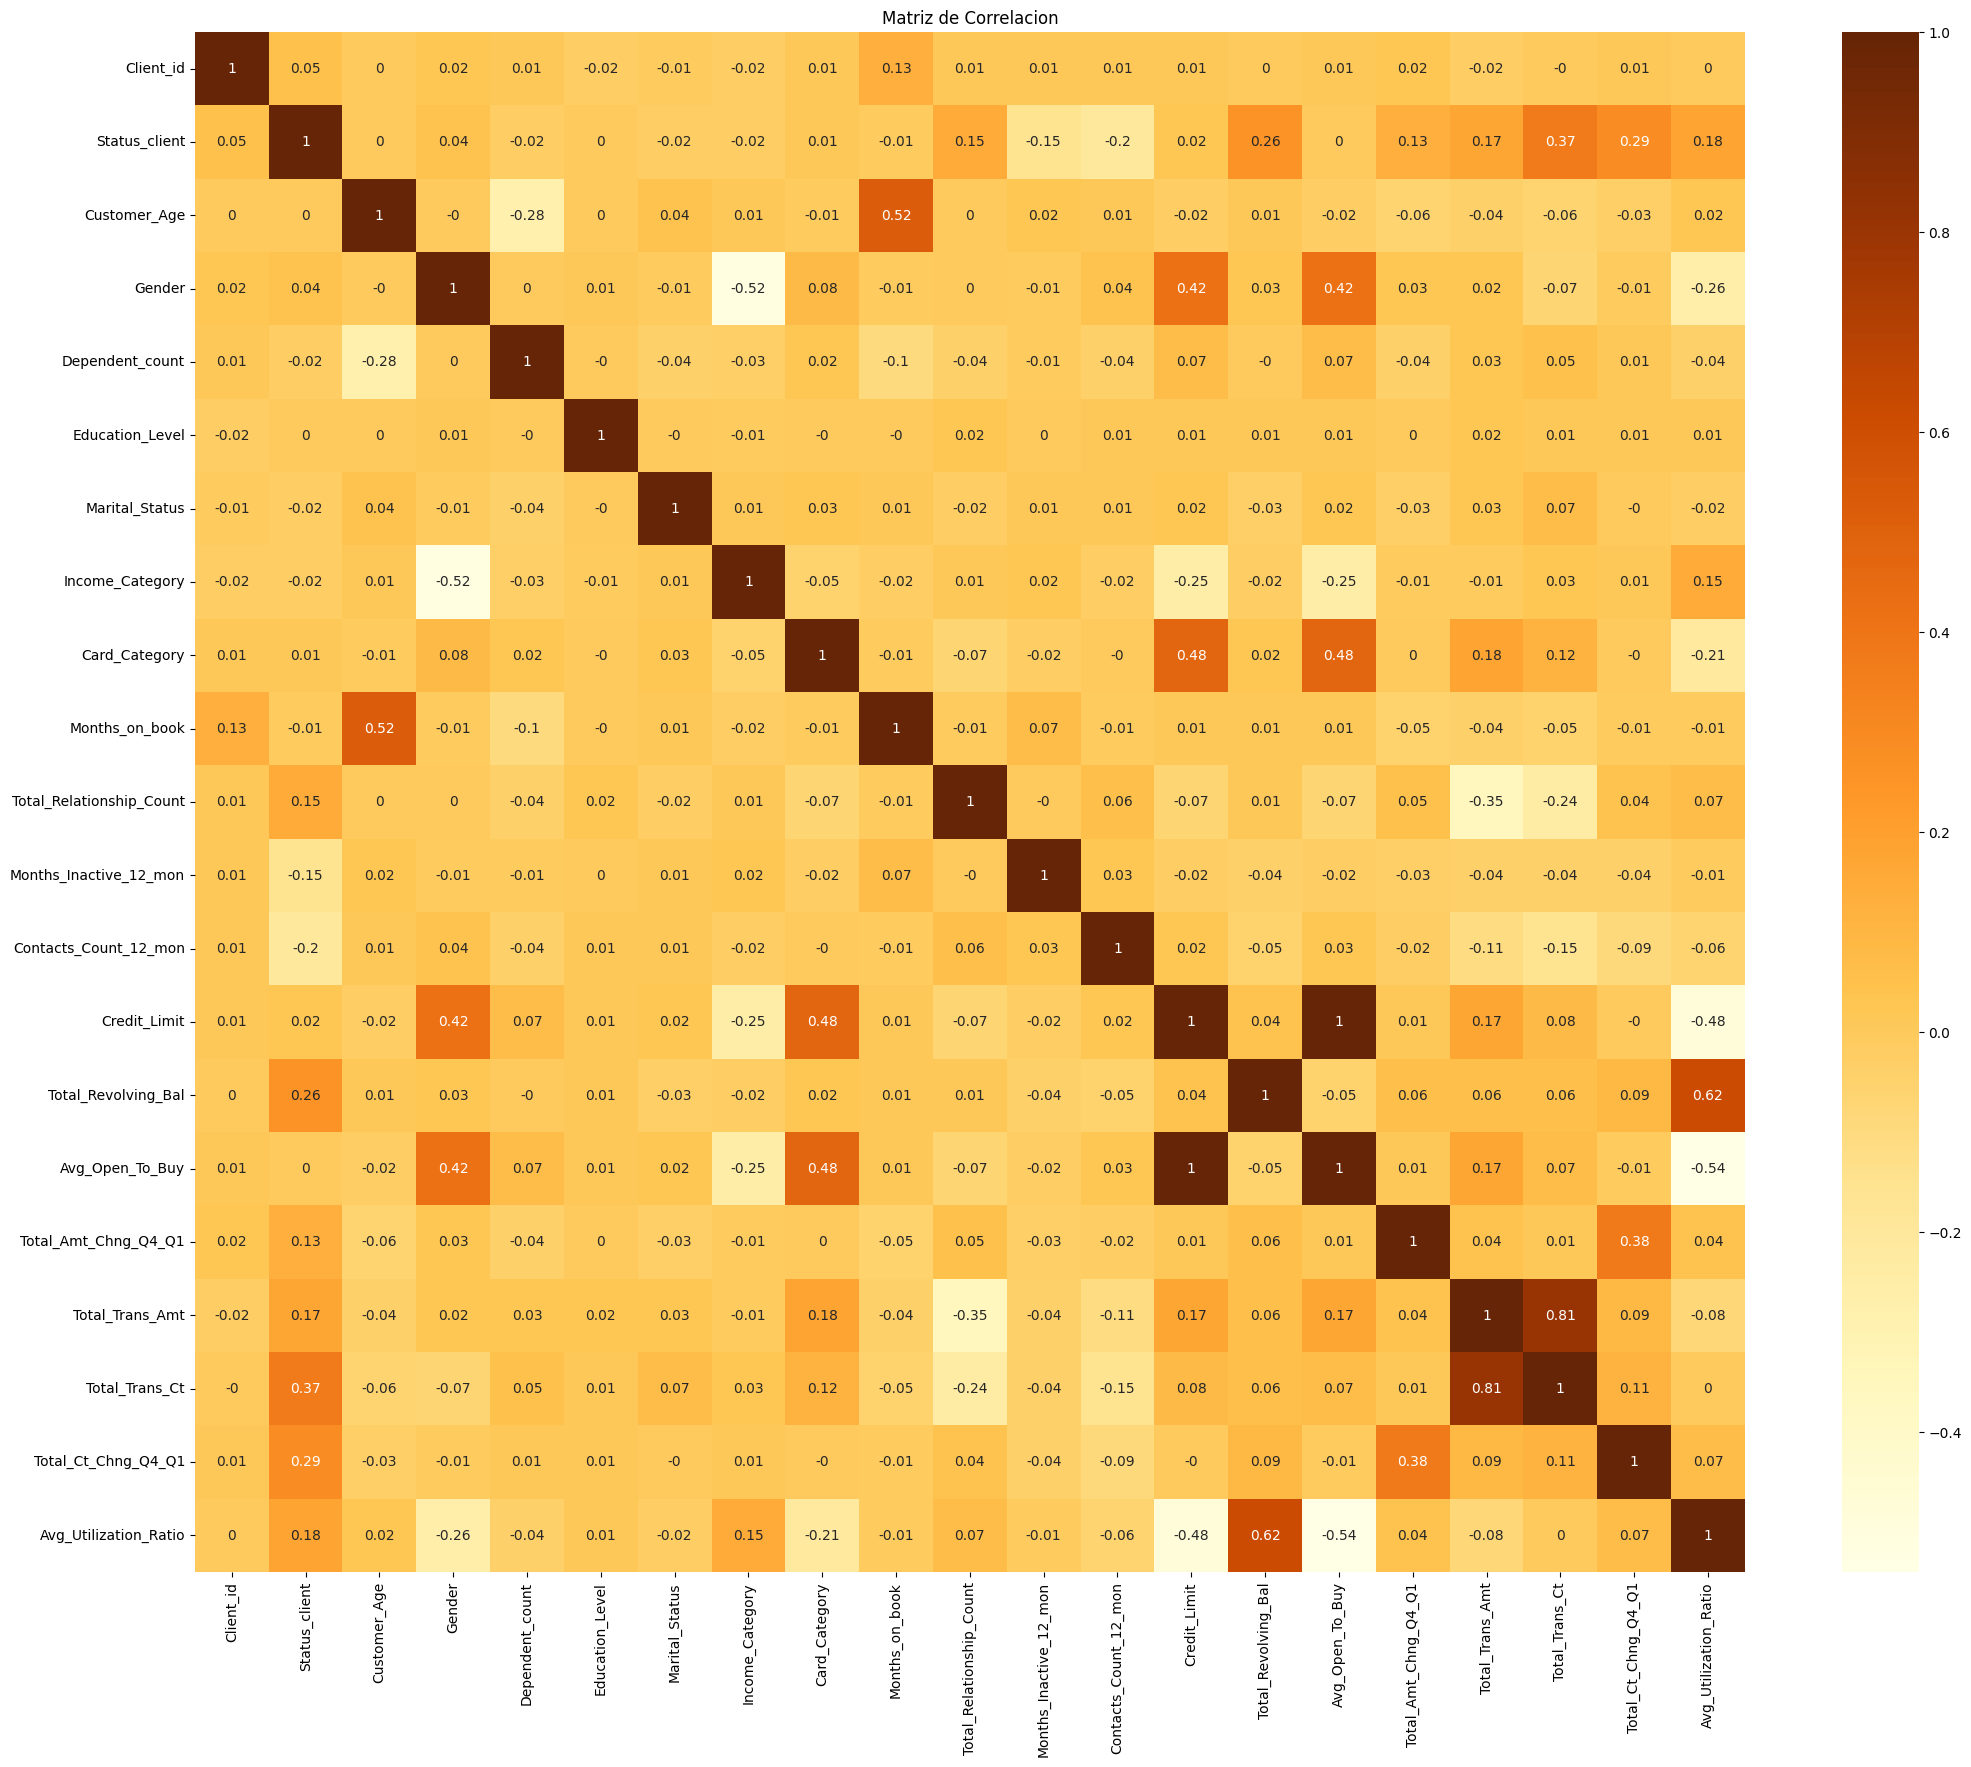

In [17]:
correlation_matrix = df.corr().round(2)

plt.figure(figsize=(25, 20))
plt.title('Matriz de Correlacion')
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.show()

Comentario: Observamos que las variables Credit_Limit y Avg_Open_To_Buy poseen un alta correlacion por lo cual retiramos una de ellas para evitar problemas de interpretacion en nuestro modelo

In [18]:
df['Status_client'] = df['Status_client'].astype(str)
df['Status_client'] = df['Status_client'].replace('1', 'Existing Customer')
df['Status_client'] = df['Status_client'].replace('0', 'Attrited Customer')

Comentario: Retornamos los valores de nuestra variable status a como estaba antes (categorica)

In [19]:
df = df.drop(['Client_id', 'Avg_Open_To_Buy'], axis = 1)

Comentario:  Retiramos de nuestro dataframe las columnas que no usaremos en nuestro modelo

##   Stage 4: Data Modeling

In [20]:
X = df.drop('Status_client', axis = 1)
X = X.values
y = df['Status_client']

Comentario:  Separamos nuestro target, de nuestras variables de entrenamiento

In [21]:
scaler = RobustScaler() # x_scaled = (x - Q1) / (Q3 - Q1)
X_standard = scaler.fit_transform(X)

Comentario:  Aplicamos un RobustScaler para escalar la data que presenta outliers

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=42)
print("Data de entrenamiento: ", X_train.shape[0])
print("Data de testeo: ", X_test.shape[0])

Data de entrenamiento:  7088
Data de testeo:  3039


Comentario:  Dividimos nuestro dataset en un 30% de testeo y un 70% de entrenamiento

                   precision    recall  f1-score   support

Attrited Customer       0.63      0.62      0.62       496
Existing Customer       0.93      0.93      0.93      2543

         accuracy                           0.88      3039
        macro avg       0.78      0.77      0.77      3039
     weighted avg       0.88      0.88      0.88      3039

Accuracy: 0.8772622573214873


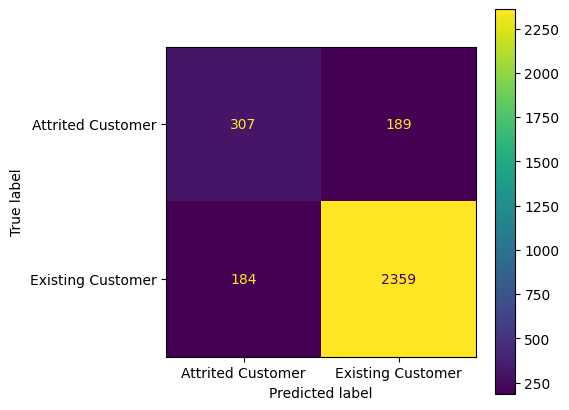

In [23]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

accuracy = accuracy_score(y_test, previsoes)
print('Accuracy:', accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Attrited Customer', 'Existing Customer'])
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

                   precision    recall  f1-score   support

Attrited Customer       0.78      0.54      0.64       496
Existing Customer       0.92      0.97      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.85      0.76      0.79      3039
     weighted avg       0.89      0.90      0.89      3039

Accuracy: 0.8999670944389602


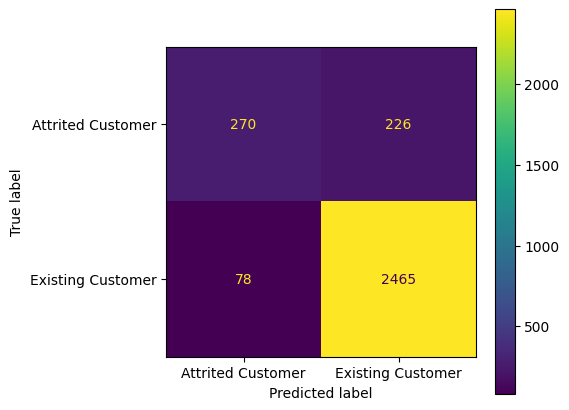

In [24]:
logistic = LogisticRegression(max_iter=100, random_state = 1)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

accuracy = accuracy_score(y_test, previsoes)
print('Accuracy:', accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Attrited Customer', 'Existing Customer'])
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

                   precision    recall  f1-score   support

Attrited Customer       0.94      0.82      0.88       496
Existing Customer       0.97      0.99      0.98      2543

         accuracy                           0.96      3039
        macro avg       0.95      0.91      0.93      3039
     weighted avg       0.96      0.96      0.96      3039

Accuracy: 0.9628167160250082


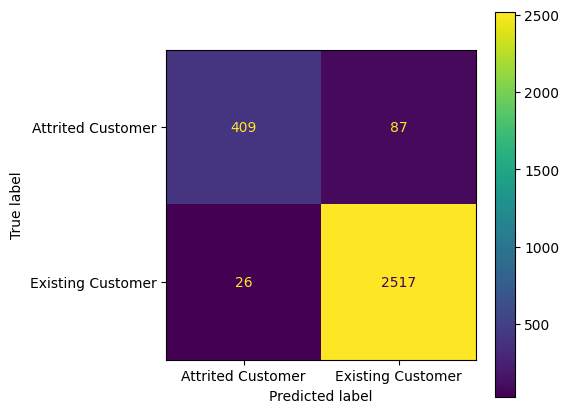

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=600, random_state=42)
rf_classifier.fit(X_train, y_train)
previsoes = rf_classifier.predict(X_test)

random_forest = (classification_report(y_test, previsoes))
print(random_forest)

accuracy = accuracy_score(y_test, previsoes)
print('Accuracy:', accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Attrited Customer', 'Existing Customer'])
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm_display.plot(ax=ax)
plt.show()

Comentario:  Evaluamos la data de entrenamiento con 3 distintos modelos, obteniendo mejores resultados (metricas) con el Modelo Random Forest (96% de exactitud) por lo cual este sera nuestro modelo a considerar.

##   Stage 5: Model Deployment

In [26]:
df_result = pd.read_excel(r'C:\Personal\TRABAJO\NEO CONSULTING\BankChurners - dummy.xlsx')

In [27]:
df = df_result.copy()

df['Client_id'] = df['Client_id'].astype(str)
array_id = df['Client_id'].unique()
print(len(array_id))

# Age Ranges
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']

df['Customer_Age'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)
df['Customer_Age'] = df['Customer_Age'].astype(str)

df['Education_Level'] = df['Education_Level'].replace({'Unknown': 'Graduate'})
df['Marital_Status'] = df['Marital_Status'].replace({'Unknown': 'Married'})
df['Income_Category'] = df['Income_Category'].replace({'Unknown': 'Less than $40K'})

selected_columns = ['Customer_Age', 'Gender', 'Education_Level','Marital_Status', 'Income_Category', 'Card_Category']

label_encoder = LabelEncoder()

#   Transformar
for column in selected_columns:
    df[column] = label_encoder.fit_transform(df[column])

df = df.drop(['Client_id', 'Avg_Open_To_Buy'], axis = 1)

scaler = RobustScaler() # x_scaled = (x - Q1) / (Q3 - Q1)
X_standard = scaler.fit_transform(df)

3597


In [28]:
predicciones = rf_classifier.predict(X_standard)

df_result['Status_client'] = predicciones

df_result[df_result['Status_client'] == "Attrited Customer"]

,Client_id,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Status_client
14,15,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,...,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,Attrited Customer
21,22,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,...,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,Attrited Customer
23,24,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,...,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,Attrited Customer
24,25,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,...,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000,Attrited Customer
28,29,44,F,3,Uneducated,Single,Unknown,Blue,34,5,...,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,Attrited Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,3437,47,F,3,Graduate,Married,$40K - $60K,Blue,31,6,...,6,5496.0,0,5496.0,0.548,1913,34,0.308,0.000,Attrited Customer
3493,3494,46,M,5,Doctorate,Single,$60K - $80K,Blue,39,4,...,3,11464.0,0,11464.0,1.020,3660,55,1.037,0.000,Attrited Customer
3520,3521,61,M,0,Uneducated,Married,$120K +,Blue,36,4,...,4,24172.0,2517,21655.0,0.424,1658,27,0.500,0.104,Attrited Customer
3555,3556,49,M,2,High School,Divorced,$40K - $60K,Blue,39,2,...,4,14839.0,512,14327.0,0.176,1453,26,0.130,0.035,Attrited Customer


#   References

●   https://medium.com/swlh/complete-life-cycle-of-a-data-science-machine-learning-project-13df81bbd8eb <br>
●   https://www.youtube.com/watch?v=vN5uZZ1h7VE <br>